In [1]:
# Kirolous Shenouda
# June 29, 2021
# Placement Data Project
#
# My goal for this project analyze a dataset of applicants for a business company. The data contains the 
# applicants' gender, high school graduation percentage, college graduation percentage, college major, work
# experience, applicant status, and salary if the applicant's status is 'Placed.' Some things I want to
# figure out is which factor influenced a candidate in getting placed, whether or not percentage matters
# for an applicant to get placed, and which degree specialization is much demanded by corporate.

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
placement = pd.read_csv('Placement_Data_Full_Class.csv')

In [4]:
placement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
sl_no             215 non-null int64
gender            215 non-null object
ssc_p             215 non-null float64
ssc_b             215 non-null object
hsc_p             215 non-null float64
hsc_b             215 non-null object
hsc_s             215 non-null object
degree_p          215 non-null float64
degree_t          215 non-null object
workex            215 non-null object
etest_p           215 non-null float64
specialisation    215 non-null object
mba_p             215 non-null float64
status            215 non-null object
salary            148 non-null float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [5]:
placement.head(10)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed,425000.0
5,6,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,NaN
6,7,F,46.00,Others,49.20,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,NaN
7,8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14,Placed,252000.0
8,9,M,73.00,Central,79.00,Central,Commerce,72.00,Comm&Mgmt,No,91.34,Mkt&Fin,61.29,Placed,231000.0
9,10,M,58.00,Central,70.00,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,NaN


In [6]:
# More men (~65%) applied than women (~35%). 
placement['gender'].value_counts()

M    139
F     76
Name: gender, dtype: int64

In [7]:
# Applicants graduated high school specializing in three fields
placement['hsc_s'].unique()

array(['Commerce', 'Science', 'Arts'], dtype=object)

In [8]:
placement['degree_t'].unique()

array(['Sci&Tech', 'Comm&Mgmt', 'Others'], dtype=object)

In [9]:
# Most placed applicants get a job in Communications and Management or Science and Technology
placement['degree_t'].value_counts()

Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: degree_t, dtype: int64

In [10]:
# Placed applicants specialize in either Marketing and Human Resources or Marketing and Finances
placement['specialisation'].unique()

array(['Mkt&HR', 'Mkt&Fin'], dtype=object)

In [11]:
# 148 out of 215 applicants (~69%) are placed
placement['status'].value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

In [12]:
placed = placement[placement['status'] == 'Placed']

In [13]:
placed

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
7,8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.0,Mkt&Fin,62.14,Placed,252000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,210,M,62.00,Central,72.00,Central,Commerce,65.00,Comm&Mgmt,No,67.0,Mkt&Fin,56.49,Placed,216000.0
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0


In [15]:
# Corporate seems to demand applicants with a degree in Communications and Management,
# which make up about 69% of placed applicants
placed['degree_t'].value_counts()

Comm&Mgmt    102
Sci&Tech      41
Others         5
Name: degree_t, dtype: int64

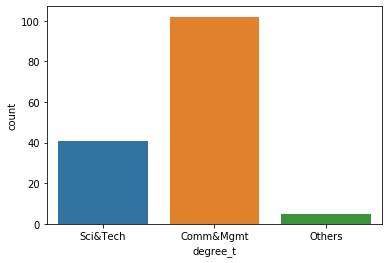

In [34]:
sns.countplot(data = placed, x = placed['degree_t'])

In [35]:
# By examining the correlation table and heatmap below, there seems to be an association between a placed 
# applicant's MBA degree percentage and college degree percentage. Generally, this company seems to hire
# applicants who graduated both college and business school with a good grade or percentage.
placed.corr()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,1.000000,-0.093480,-0.218428,-0.102250,0.041467,-0.072432,0.063764
ssc_p,-0.093480,1.000000,0.293416,0.380657,0.317892,0.430560,0.035330
hsc_p,-0.218428,0.293416,1.000000,0.221307,0.284672,0.329983,0.076819
degree_p,-0.102250,0.380657,0.221307,1.000000,0.217683,0.494093,-0.019272
etest_p,0.041467,0.317892,0.284672,0.217683,1.000000,0.284143,0.178307
mba_p,-0.072432,0.430560,0.329983,0.494093,0.284143,1.000000,0.175013
salary,0.063764,0.035330,0.076819,-0.019272,0.178307,0.175013,1.000000


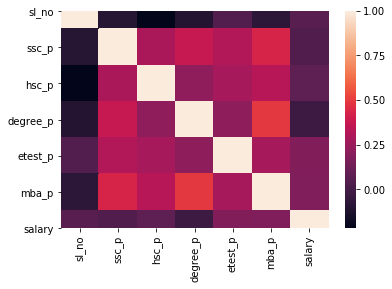

In [36]:
# Some percentages matter more than others. For instance, this heatmap shows that a graduating high school grade
# or percentage does not have as much of an impact compared to college or business school.
sns.heatmap(placed.corr())